In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


all_stats = pd.read_csv('../python_project_csv_files/2019-20_pbp.csv', header = [0])

pd.set_option("display.max_columns", None)

In [2]:
some_stats = all_stats[['GameType','WinningTeam','Quarter','AwayTeam','AwayPlay','HomeTeam','HomePlay','Shooter','ShotType','ShotOutcome','ShotDist']]
some_stats.head(5)
shooting = some_stats[some_stats['Shooter'].notna()].reset_index().drop(columns = 'index')
shooting['Team'] = shooting.apply(lambda row: row['AwayTeam'] if isinstance(row['AwayPlay'],str) else row['HomeTeam'], axis=1)
shooting.fillna('',inplace=True)
shooting['Play'] = shooting['AwayPlay'] + shooting['HomePlay']
shooting['ShotType'] = shooting['ShotType'].apply(lambda row: '3PT' if '3-pt' in row else '2PT')
shooting

regular_season = shooting[shooting['GameType']=='regular']
refined_df = regular_season[['Team','ShotType','ShotDist','ShotOutcome']]

fg_perc = refined_df.groupby(['ShotType','ShotDist']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome'])))
fg_perc
#two_point_shots = some_stats[some_stats['ShotType'].str.contains('2')].reset_index().drop(columns = 'index')
team_fg_perc = refined_df.groupby(['Team','ShotType']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome']))).reset_index(name='fg_percent')
fg_perc_3pt = team_fg_perc[team_fg_perc['ShotType'] == '3PT']
fg_perc_3pt['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]
print(fg_perc_3pt)


test = refined_df.groupby('Team').apply(lambda row: (sum((row['ShotOutcome']=='make') & (row['ShotType']=='2PT'))+sum((row['ShotOutcome']=='make') & (row['ShotType']=='3PT')))/len(row['ShotOutcome'])).reset_index(name='fg_percent')
test['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]

team_efg_perc = refined_df.groupby('Team').apply(lambda row: (sum((row['ShotOutcome']=='make') & (row['ShotType']=='2PT'))+1.5*sum((row['ShotOutcome']=='make') & (row['ShotType']=='3PT')))/len(row['ShotOutcome'])).reset_index(name='efg_percent')
team_efg_perc['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]

   Team ShotType  fg_percent  wins
1   ATL      3PT    0.333195    20
3   BOS      3PT    0.363892    48
5   BRK      3PT    0.342680    35
7   CHI      3PT    0.347502    22
9   CHO      3PT    0.351860    23
11  CLE      3PT    0.351208    19
13  DAL      3PT    0.367044    43
15  DEN      3PT    0.358550    46
17  DET      3PT    0.366713    20
19  GSW      3PT    0.333661    15
21  HOU      3PT    0.345293    44
23  IND      3PT    0.363148    45
25  LAC      3PT    0.371369    49
27  LAL      3PT    0.348796    52
29  MEM      3PT    0.349699    34
31  MIA      3PT    0.378870    44
33  MIL      3PT    0.354577    56
35  MIN      3PT    0.335827    19
37  NOP      3PT    0.369729    30
39  NYK      3PT    0.337073    21
41  OKC      3PT    0.354675    44
43  ORL      3PT    0.342821    33
45  PHI      3PT    0.367577    43
47  PHO      3PT    0.358190    34
49  POR      3PT    0.376998    35
51  SAC      3PT    0.363998    31
53  SAS      3PT    0.376051    32
55  TOR      3PT    

<ipython-input-2-76d55f210642>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_perc_3pt['wins'] = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]


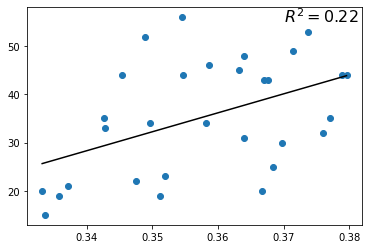

In [40]:
xd = fg_perc_3pt['fg_percent']
yd = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,25]

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.37,55,'$R^2 = %0.2f$'% Rsqr, fontsize=16)

plt.plot(xl, yl, '-k')

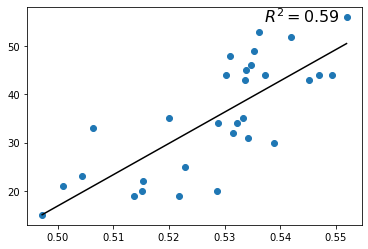

In [38]:
xd = team_efg_perc['efg_percent']
yd = team_efg_perc['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.537,55,'$R^2 = %0.2f$'% Rsqr, fontsize=16)

plt.plot(xl, yl, '-k')

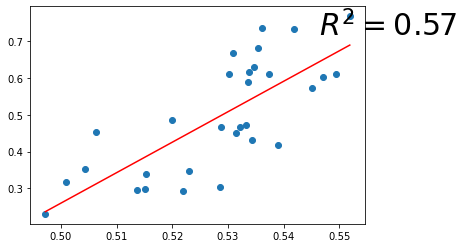

In [5]:
xd = team_efg_perc['efg_percent']
#yd = team_efg_perc['wins']

yd = [.299,.667,.486,.338,.354,.292,.573,.630,.303,.231,.611,.616,.681,.732,.466,.603,.767,.297,.417,.318,.611,.452,.589,.466,.473,.431,.451,.736,.611,.347]

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

(array([1., 0., 1., 2., 2., 2., 5., 3., 4., 1., 2., 2., 2., 1., 2.]),
 array([-23.92405559, -20.86788356, -17.81171153, -14.7555395 ,
        -11.69936747,  -8.64319544,  -5.58702341,  -2.53085138,
          0.52532065,   3.58149268,   6.63766471,   9.69383674,
         12.75000877,  15.8061808 ,  18.86235283,  21.91852486]),
 <BarContainer object of 15 artists>)

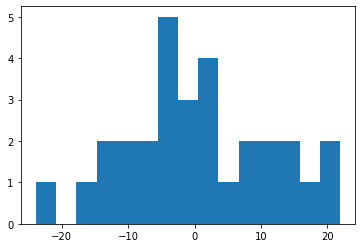

In [6]:
predicted_wins_list = []
for team in range(len(xd)):
    predicted_wins_list.append(72*(slope*xd[team]+intercept))

predicted_wins_list
actual_wins_list = [41,36,48,31,33,22,42,47,20,39,17,34,47,42,38,40,46,23,31,41,22,21,49,51,42,31,33,27,52,34]
diff_list = []
for team in range(len(predicted_wins_list)):
    diff_list.append(actual_wins_list[team] - predicted_wins_list[team])

plt.hist(diff_list,bins=15)

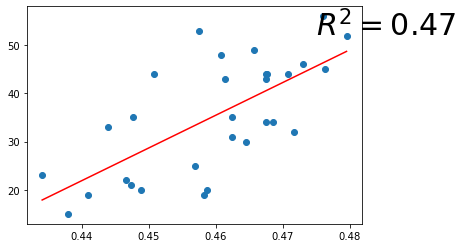

In [7]:
xd = test['fg_percent']
yd = test['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

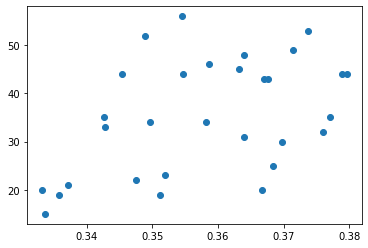

In [8]:
plt.scatter(fg_perc_3pt['fg_percent'],fg_perc_3pt['wins'])

In [9]:
shooting = some_stats[some_stats['Shooter'].notna()].reset_index().drop(columns = 'index')
shooting.head(5)

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
1,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
2,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
3,regular,TOR,1,NOP,J. Holiday misses 2-pt layup from 8 ft,TOR,NaN,J. Holiday - holidjr01,2-pt layup,miss,8.0
4,regular,TOR,1,NOP,NaN,TOR,K. Lowry misses 3-pt jump shot from 25 ft,K. Lowry - lowryky01,3-pt jump shot,miss,25.0


In [10]:
shooting['Team'] = some_stats.apply(lambda row: row['AwayTeam'] if isinstance(row['AwayPlay'],str) else row['HomeTeam'], axis=1)

In [11]:
#shooting.fillna('',inplace=True)
#shooting['Play'] = shooting["VISITORDESCRIPTION"] + older_stats["HOMEDESCRIPTION"]

In [12]:
shooting.groupby(['Team','ShotType','ShotOutcome']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome'])))


Team  ShotType        ShotOutcome
ATL   2-pt dunk       make           1.0
                      miss           0.0
      2-pt hook shot  make           1.0
                      miss           0.0
      2-pt jump shot  make           1.0
                                    ... 
WAS   2-pt jump shot  miss           0.0
      2-pt layup      make           1.0
                      miss           0.0
      3-pt jump shot  make           1.0
                      miss           0.0
Length: 300, dtype: float64